# Part 2 - Working with Geometries

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-geometries" data-toc-modified-id="Creating-geometries-1">Creating geometries</a></span><ul class="toc-item"><li><span><a href="#Creating-Point-objects" data-toc-modified-id="Creating-Point-objects-1.1">Creating <code>Point</code> objects</a></span></li><li><span><a href="#Creating-Polyline-objects" data-toc-modified-id="Creating-Polyline-objects-1.2">Creating <code>Polyline</code> objects</a></span></li><li><span><a href="#Creating-Polygon-objects" data-toc-modified-id="Creating-Polygon-objects-1.3">Creating <code>Polygon</code> objects</a></span></li><li><span><a href="#Creating-geometries-with-a-different-spatial-reference" data-toc-modified-id="Creating-geometries-with-a-different-spatial-reference-1.4">Creating geometries with a different spatial reference</a></span></li><li><span><a href="#Text-representations-of-geometries" data-toc-modified-id="Text-representations-of-geometries-1.5">Text representations of geometries</a></span></li></ul></li><li><span><a href="#Working-with-geometry-object" data-toc-modified-id="Working-with-geometry-object-2">Working with geometry object</a></span><ul class="toc-item"><li><span><a href="#Geometry-Engines" data-toc-modified-id="Geometry-Engines-2.1">Geometry Engines</a></span></li></ul></li><li><span><a href="#Creating-geometries-interactively-using-the-map-widget" data-toc-modified-id="Creating-geometries-interactively-using-the-map-widget-3">Creating geometries interactively using the map widget</a></span><ul class="toc-item"><li><span><a href="#Computing-area-of-a-polygon-drawn-on-the-map" data-toc-modified-id="Computing-area-of-a-polygon-drawn-on-the-map-3.1">Computing area of a polygon drawn on the map</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4">Conclusion</a></span></li></ul></div>

## Creating geometries

The [`arcgis.geometry`](https://developers.arcgis.com/python/api-reference/arcgis.geometry.html#) module defines geometry types for working with geographic features in a GIS. It provides functions which use geometric types as input and output as well as functions for easily converting geometries between different representations.

Several functions in this module accept geometries represented as Python dictionary objects. To get started, we import the following classes and functions from the `geometry` module.

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry

In [2]:
gis = GIS('home')

### Creating `Point` objects

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#arcgis.geometry.Point">point</a> contains x and y fields along with a `spatialReference` field. A point can also contain m and z fields as well, representing the vertical and linear referencing system coordinates. A point is empty when its x field is present and has the value null or the string `NaN`. An empty point has no location in space.

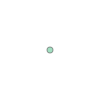

In [3]:
pt = Point({"x" : -118.15, "y" : 33.80, 
            "spatialReference" : {"wkid" : 4326}})
pt

As shown above, you can create a `Point` geometry using a dictionary. The `x` and `y` key value pairs in this example contain longitude and latitude respectively. The `spatialReference` dictionary with the `wkid` kvp specifies the coordinate system in which `x` and `y` are in. Thus, you could have passed it X and Y values from a projected coordinate system and constructed the same point by specifying the appropriate `wkid`.

When using the Jupyter Notebook (or ArcGIS Notebook) interface, you can query a geometry and get a visual representation as shown in the cell earlier. Alternately you can check the validity of a geometry by querying the `is_valid()` method.

In [4]:
pt.is_valid()

True

In [5]:
print(pt.is_empty)

False


To get the geometry type, use the `type` property:

In [6]:
print(pt.type)

Point


To get the object type in Python, use the built-in `type` function:

In [7]:
type(pt)

arcgis.geometry._types.Point


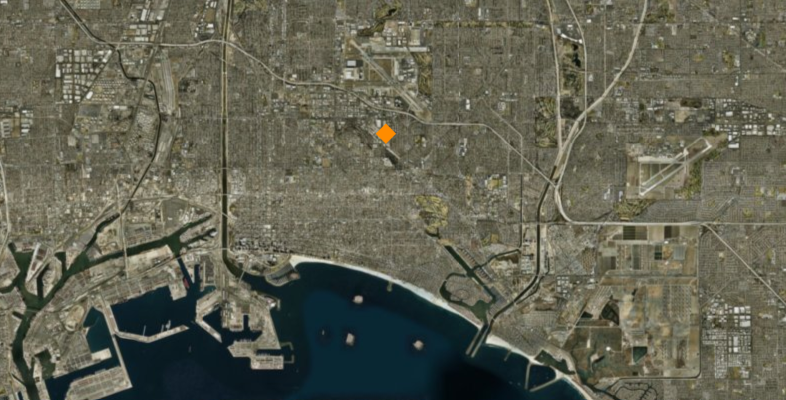

In [16]:
map0 = gis.map("Port of Long Beach")
map0.basemap = "satellite"
map0.zoom = 6
map0

In [12]:
pt_sym = {
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255,140,0,255],        
    "size": 14,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255,140,0,255],
        "width": 1}
}
map0.draw(pt, symbol=pt_sym)

### Creating `Polyline` objects

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#polyline">polyline</a> contains an array of `paths` or `curvePaths` and a `spatialReference`. For polylines with curvePaths, see the sections on JSON curve object and Polyline with curve. Each path is represented as an array of points, and each point in the path is represented as an array of numbers. A polyline can also have boolean-valued `hasM` and `hasZ` fields. An empty polyline is represented with an empty array for the paths field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error.

First, let us try initializing an **invalid** polyline object, and see how it is handled.

In [8]:
line = {
  "paths" : [[[-97.06138],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline = Polyline(line)

In [9]:
print(polyline.spatialReference)

{'wkid': 4326}


In [10]:
print(polyline.is_valid())

False


The geometry we just created is invalid, yet the API allowed you to still create it. This because, the API does not check for validity in an eager fashion. Rather it checks when `is_valid()` is called, in an on-demand fashion. This is for performance reasons.


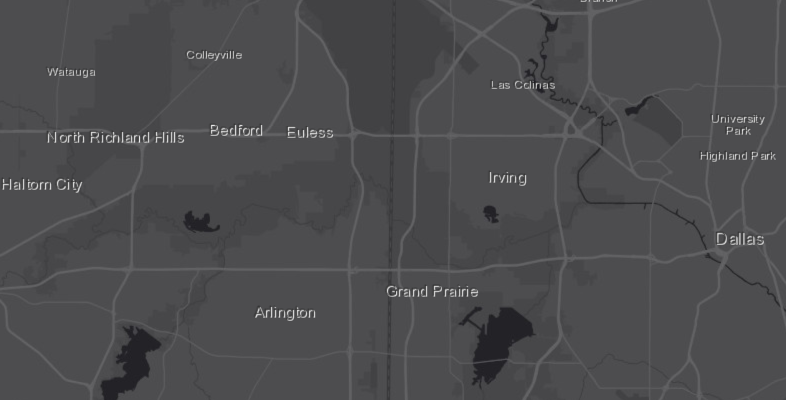

In [49]:
map1 = gis.map()
map1.basemap = "dark-gray"
map1.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map1.zoom = 11.0
map1

In [25]:
map1.draw(polyline) # would not draw anything

That did not draw anything. Now, try a valid polyline geometry. In the example below, we specify coordinates in latitude and longitude and specify the coordinate system appropriately as GCS WGS 84 using the `wkid` `4326`.

In [11]:
line1 = {
  "paths" : [[[-97.06138,32.837],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline1 = Polyline(line1)
print(polyline1.is_valid())

True


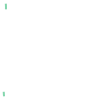

In [12]:
polyline1


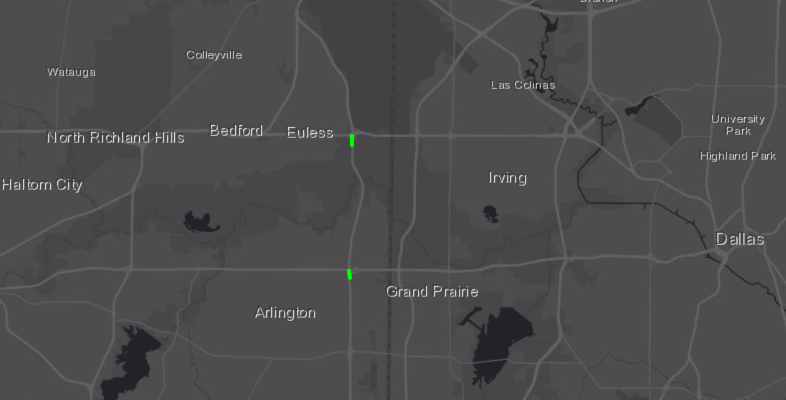

In [52]:
map2 = gis.map()
map2.basemap = "dark-gray"
map2.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}
map2.zoom = 11.0
map2

In [51]:
sym_poly_aoi = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [0,255,0,255],
     "width": 3}
}
map2.draw(polyline1, symbol = sym_poly_aoi)

### Creating `Polygon` objects

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#polygon">polygon</a> contains an array of `rings` or `curveRings` and a `spatialReference`. Each ring is represented as an array of points. The **first point of each ring is always the same as the last point**. Each point in the ring is represented as an array of numbers. A polygon can also have boolean-valued `hasM` and `hasZ` fields. An empty polygon is represented with an empty array for the rings field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error. 

Exterior rings are **oriented clockwise**, while **holes** are oriented **counter-clockwise**. Rings can touch at a vertex or self-touch at a vertex, but there should be no other intersections.

In [13]:
polygon1 = Polygon({'spatialReference': {'latestWkid': 4326}, 
                'rings': [[[-97.06587202923951, 32.75656343500563], [-97.07033522518535, 32.75454232619796],
                           [-97.07179434702324, 32.75443405154119], [-97.073596791488, 32.75475887587208],
                           [-97.07501299810983, 32.75475887587208], [-97.07492716677937, 32.75616643554153],
                           [-97.07595713555828, 32.75602207118053], [-97.07115061698558, 32.75887321736912],
                           [-97.06930525730476, 32.75890930713694], [-97.06479914614289, 32.75739351976198],
                           [-97.06587202923951, 32.75656343500563]]]
                })

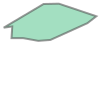

In [14]:
polygon1

In [15]:
print(polygon1.type)

Polygon


In [16]:
type(polygon1)

arcgis.geometry._types.Polygon


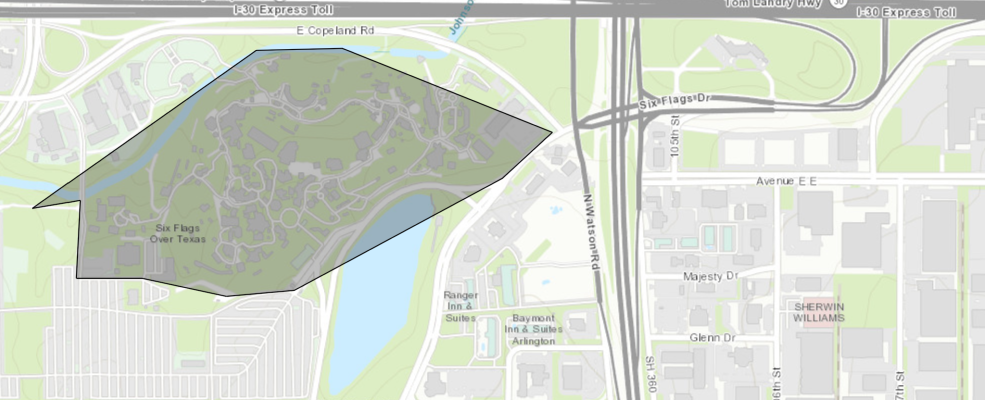

In [143]:
map3 = gis.map()
map3.basemap = "topo"
map3.zoom = 16
map3.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3

In [120]:
map3.draw(polygon1)

### Creating geometries with a different spatial reference
In the examples above, all geometries were created using latitude and longitude. Hence we used a spatial reference of `4326` which corresponds to the WGS84 GCS. In the cell below, we will create the same polygon object, but with a PCS.

In [19]:
polygon1_proj = Polygon({'spatialReference': {'wkid': 3857}, 
                  'rings': [[[-10806331.461044524, 3862983.679353406], [-10806446.116586955, 3862964.5700963344], 
                             [-10805911.057388945, 3863341.9779235027], [-10805705.632875424, 3863346.7552377703], 
                             [-10805204.01487729, 3863146.1080385167], [-10805323.447733987, 3863036.229810354],  
                             [-10805820.288417853, 3862768.7002113485], [-10805982.717102963, 3862754.368268545], 
                             [-10806183.364302218, 3862797.3640969563], [-10806341.01567306, 3862797.3640969563], 
                             [-10806331.461044524, 3862983.679353406]]]
                })

The PCS used here is Web Mercator Auxiliary Sphere with a wkid of `3857`. The coordinates is in meters.


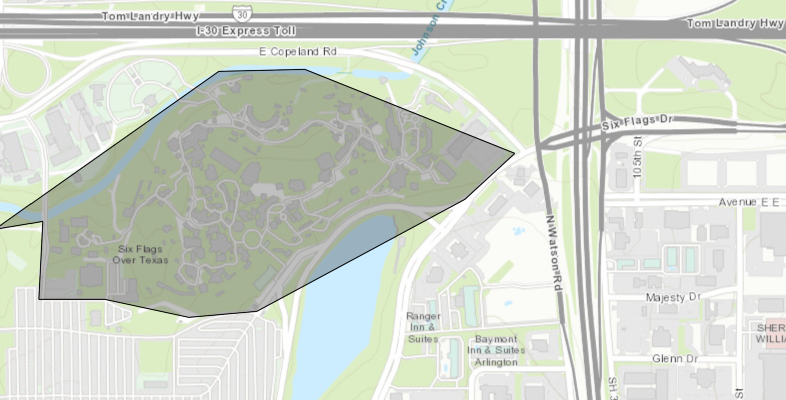

In [70]:
map3_proj = gis.map()
map3_proj.basemap = "topo"
map3_proj.zoom = 16
map3_proj.center = {'x': -97.05815464365813, 'y': 32.75494892021667, 
               "spatialReference" : {"wkid" : 4326}}
map3_proj

In [69]:
map3_proj.draw(polygon1_proj)

As you can see from both the maps, we were able to create the same geometries using different coordinate systems and they would line up when plotted one over the other.

### Text representations of geometries

At any point in time, you can view the text representations of your geometry objects in three forms as shown below:

In [18]:
print("Geometry represented in JSON:\n", polygon1.JSON, 
      "\n\nGeometry represented in WKB:\n", polygon1.WKB, 
      "\n\nGeometry represented in WKT:\n", polygon1.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

You can convert from one spatial reference to another through a process called 'projection'. The `arcgis.geometry.project()` function can be used for this. This function sends to geometries (in JSON format seen above) to the [Geometry Service](https://developers.arcgis.com/rest/services-reference/geometry-service.htm) configured with your GIS. The service performs the projection and sends it back to your Python client. 

If you have large geometries, projecting them locally (either using ArcPy or Shapely backend) is recommended over sending them over to the geometry service. For more details on this, checkout part 3 - spatial operations on this guide.

In [20]:
geom1_reprojected = project(geometries = [polygon1_proj], in_sr = 3857, out_sr = 4326)[0]
geom1_reprojected.type

'Polygon'

You can inspect the coordinates by printing them as shown below. Compare those with the geometries printed earlier.

In [21]:
print("Geometry represented in JSON:\n", geom1_reprojected.JSON, 
      "\n\nGeometry represented in WKB:\n", geom1_reprojected.WKB, 
      "\n\nGeometry represented in WKT:\n", geom1_reprojected.WKT)

Geometry represented in JSON:
 {'type': 'MultiPolygon', 'coordinates': [(((-97.06587202923951, 32.75656343500563), (-97.07033522518535, 32.75454232619796), (-97.07179434702324, 32.75443405154119), (-97.073596791488, 32.75475887587208), (-97.07501299810983, 32.75475887587208), (-97.07492716677937, 32.75616643554153), (-97.07595713555828, 32.75602207118053), (-97.07115061698558, 32.75887321736912), (-97.06930525730476, 32.75890930713694), (-97.06479914614289, 32.75739351976198), (-97.06587202923951, 32.75656343500563)),)]} 

Geometry represented in WKB:
 b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@b\xfbP_\x80DX\xc0\xe7;\xcb\xd7\x94`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@\x83\

## Working with geometry object

Properties of geometry objects include,
  - `centroid`: returns the center of the geometry
  - `area`: returns the area of a polygon feature, or `None` for all other feature types. The area is in the units of the spatial reference.
  - `length`: returns the length of the linear feature, or zero for point and multipoint feature types. The length units is the same as the spatial reference.
  - `extent`: returns the extent of the geometry as a tuple containing (xmin, ymin, xmax, ymax).
  - `as_arcpy`: returns the class as an `arcpy` `SpatialReference` object
  - `as_shapely`: returns a `shapely` geometry object

You will see that for geometry objects in different spatial references, the properties return varied results (transformed through the spatial reference).

In [23]:
polygon1_proj.centroid, geom1_reprojected.centroid

((-10805839.610595193, 3863047.3497144855),
 (-97.0705088053709, 32.756647420138925))

In [24]:
polygon1_proj.area, geom1_reprojected.area

(431509.386639783, 2.92840477522626e-05)

The variable `geom1_reprojected` has the same polygon in GCS spatial reference. Accessing area or length while in GCS may not yield meaningful results as the units are decimal degrees. Hence, the recommendation is to project the geometry to a PCS (such as `polygon1_proj` in this example which uses Web Mercator Aux Sphere projection with units in meters) and access those properties in projected units.

In [25]:
polygon1_proj.length, geom1_reprojected.length

(2955.798323907705, 0.025605496007056323)

In [26]:
print(polygon1_proj.extent)
print(geom1_reprojected.extent)

(-10806446.116586955, 3862754.368268545, -10805204.01487729, 3863346.7552377703)
(-97.07595713555828, 32.75443405154119, -97.06479914614289, 32.75890930713694)


### Geometry Engines

The Python API uses either [`shapely`](https://pypi.org/project/Shapely/) or [`arcpy`](https://www.esri.com/en-us/arcgis/products/arcgis-python-libraries/libraries/arcpy) as back-ends (engines) for processing geometries. The API is identical no matter which you use. However, at any point in time, only one engine will be used. The section below shows you how to access your geometries as their corresponding back-end objects.

By default, the geometry module looks for `arcpy`. If not present in your current `conda` environment, it looks for `shapely`. The cell below shows how to access the current object as a native `shapely` geometry object.

In [30]:
try:
    polygon1_proj_shapely_obj = polygon1_proj.as_shapely
    print(type(polygon1_proj_shapely_obj))
except OSError as e:
    print(e)

<class 'shapely.geometry.multipolygon.MultiPolygon'>


If your environment did not have `shapely`, you would be presented with an error similar to shown below:

In [178]:
try:
    polygon1_proj.as_shapely
except OSError as e:
    print(e)

[WinError 126] The specified module could not be found


If your `conda`environment has `arcpy`, you can access the geometry as an `arcpy` geometry as shown below:

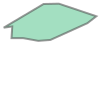

In [175]:
geom1_reprojected.as_arcpy

## Creating geometries interactively using the map widget

The examples shown above create geometry objects by specifying the full coordinates. Another way to create simple and small geometries is interactively using the map widget. The map widget supports [drawing geometries](https://developers.arcgis.com/python/guide/using-the-map-widget/#Drawing-graphics-on-the-map). In addition, it supports [registering callbacks](https://developers.arcgis.com/python/guide/advanced-map-widget-usage/#Callbacks) with which you can extract the geometry you just drew.

The following example uses the `arcgis.geometry` module to compute the length of a path that the user draws on the map. The particular scenario is of a jogger who runs in the Central Park in New York (without gizmos like GPS watches to distract him/her), and wants a rough estimate of their daily runs based on the path taken. The notebook starts out with a satellite map of Central Park in New York:

In [ ]:
map5 = gis.map()
map5.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235706.664189668,
 'ymin': 4977993.551288029,
 'xmax': -8233351.448255569,
 'ymax': 4978949.014141619}
map5.basemap = 'satellite'
map5

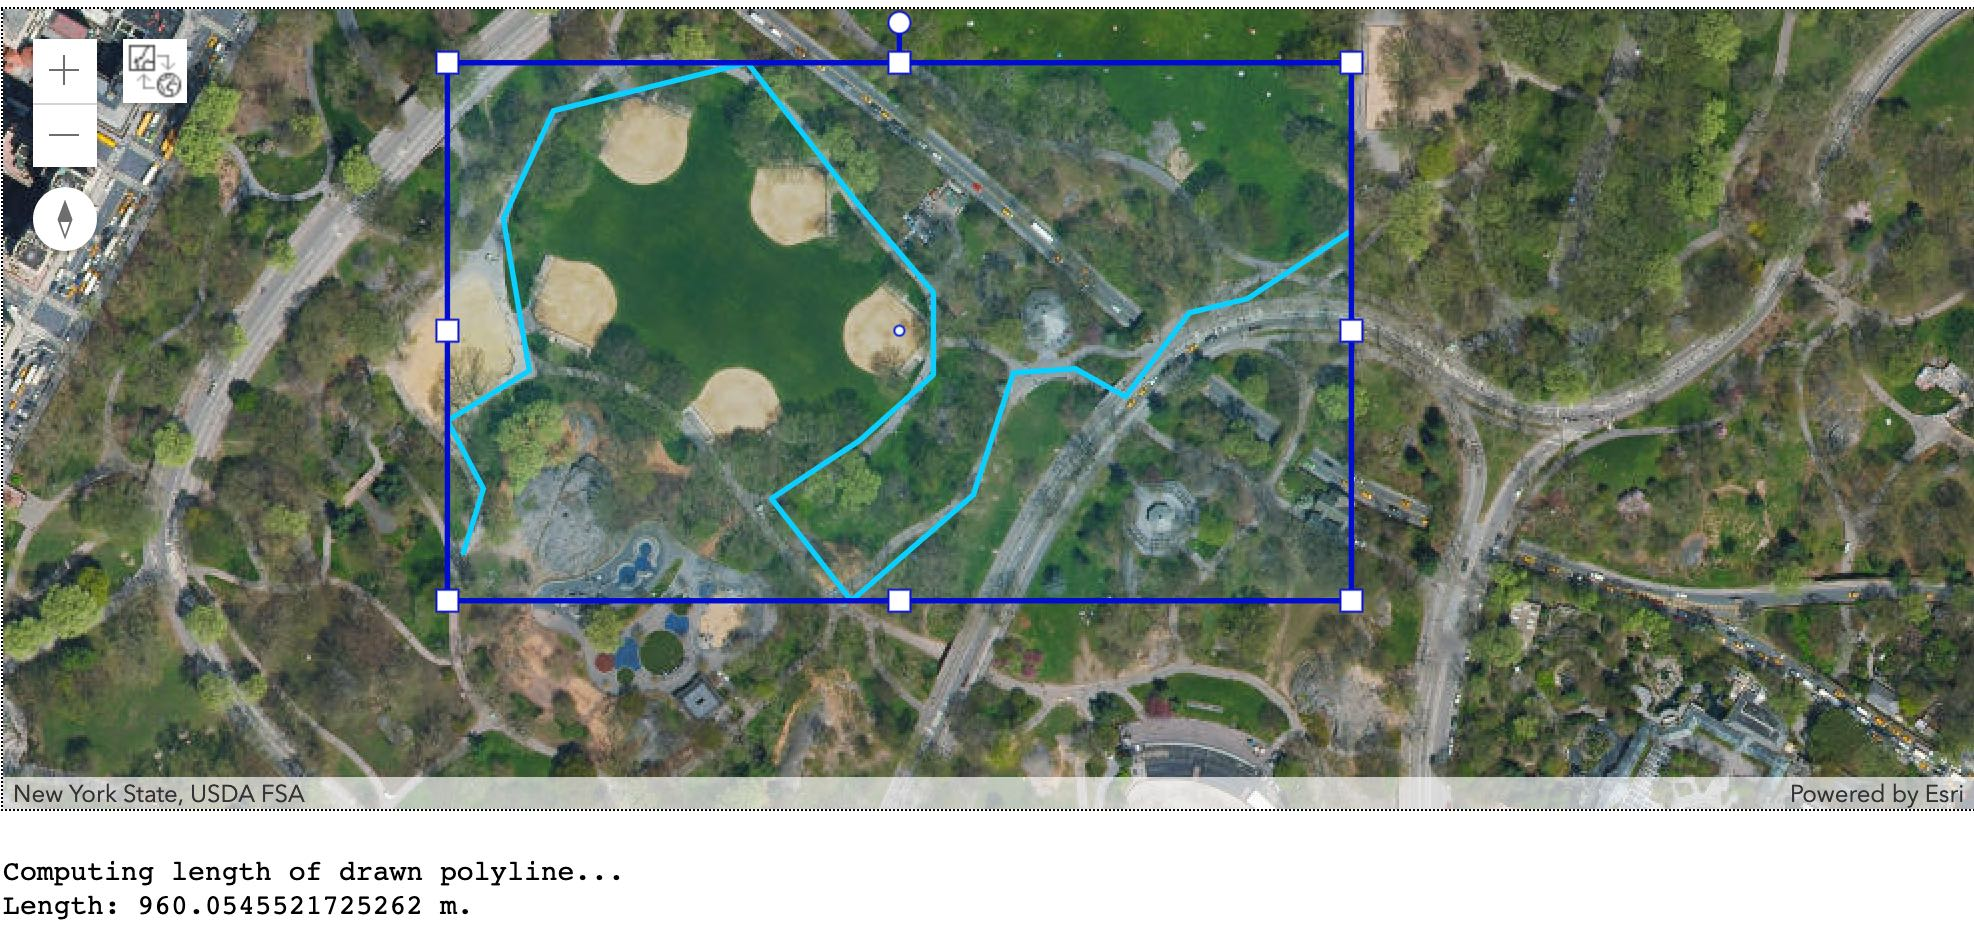

In [60]:
# Define the callback function that computes the length.
drawn_line = None
def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")['lengths']
    print("Length: " + str(length[0]) + " m.")
    # update the geometry
    global drawn_line
    drawn_line = g

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
drawn_line = map5.on_draw_end(calc_dist)

We want the reader to draw a freehand polyline to indicate the paths that the runner takes for his/her runs. When the drawing operation ends, we use the GIS's Geometry service to compute the length of the drawn path. We can do this by adding an event listener (i.e. a `callback` function) to the map widget that gets called when drawing is completed (i.e. `on_draw_end`). The event listener then computes the geodesic length of the drawn geometry using the geometry service and prints it out:

In [61]:
map5.draw("polyline")

Now draw a freehand sketch on the map above, representing the jogger's path. Finish the sketch by double-clicking the mouse. You should notice the length printed below the map.

You can inspect the geometry that you just drew as it was stored in a variable.

In [62]:
drawn_line

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'paths': [[[-8235387.89786598, 4978256.38321168],
   [-8235366.399951775, 4978437.921153862],
   [-8235239.801123674, 4978550.188039159],
   [-8235175.307381056, 4978660.066267322],
   [-8235034.3766101515, 4978636.1796959825],
   [-8234848.061353702, 4978490.47161081]]]}

### Computing area of a polygon drawn on the map
Similar to the line shown above, you could draw a polygon and compute properties such as area.


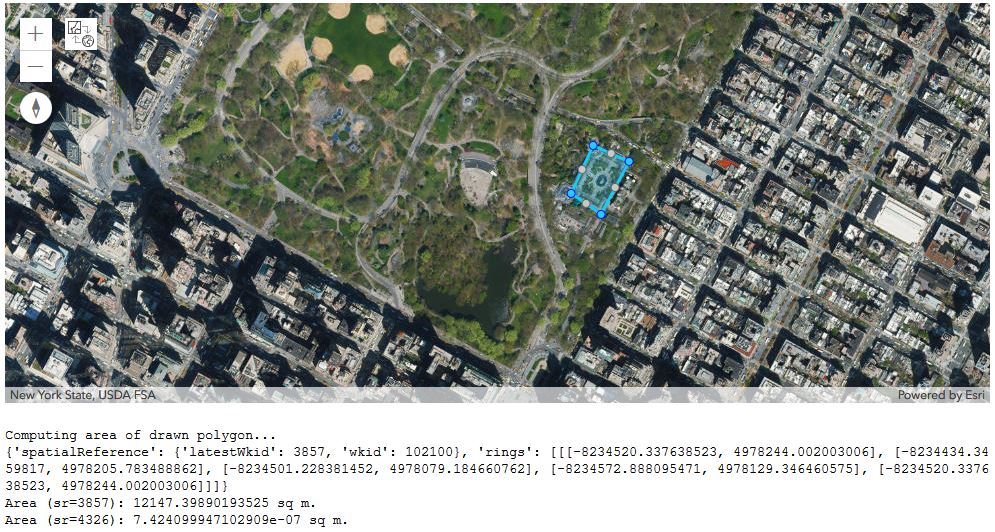

In [180]:
map6 = gis.map()
map6.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -8235706.664189668,
 'ymin': 4977993.551288029,
 'xmax': -8233351.448255569,
 'ymax': 4978949.014141619}
map6.basemap = 'satellite'
map6

Now draw a polygon on the map representing the route taken by the jogger

In [71]:
# Define the callback function that computes the area.
drawn_polygon = None
def calc_area(map1, g):
    print("Computing area of drawn polygon...")
    area0 = Polygon(g).area
    print("Area (sr=3857): " + str(area0) + " sq m.")
    area = project(geometries=[Polygon(g)], in_sr=g['spatialReference'], out_sr=4326)[0].area
    print("Area (sr=4326): " + str(area) + " degrees")
    global drawn_polygon
    drawn_polygon = g

# Set calc_dist as the callback function to be invoked when a polygon is drawn on the map
map6.on_draw_end(calc_area)

In [72]:
map6.draw("polygon")

Now draw a polygon on `map6`, finish it by double clicking the mouse pointer. The area in two different coordinate systems (PCS and GCS) are printed. As discussed earlier, to get meaningful results for lengths and areas, it is best to project the geometry to a PCS. The cell below shows the geometry you just drew on the map.

In [73]:
drawn_polygon

{'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'rings': [[[-8234513.649354945, 4978225.887995541],
   [-8234432.43501239, 4978194.8354528],
   [-8234434.823669524, 4978173.337538593],
   [-8234406.159783917, 4978156.616938656],
   [-8234456.32158373, 4978075.402596101],
   [-8234489.762783606, 4978096.9005103065],
   [-8234508.872040678, 4978087.34588177],
   [-8234585.309068965, 4978116.009767379],
   [-8234513.649354945, 4978225.887995541]]]}

## Conclusion

In this part of the guide series to `arcgis.geometry` module, you have seen the introduction to the module, how to create geometry objects, what are the basic properties, and how to work with one, including its interactions with map widgets.

Next, part 3 will discuss the spatial operations of geometry objects, and how to process through geometry services, and part 4 will talk about geometry filters and how they being applied in query, search and mapping.